# ML4VA: Machine Learning for Virginia

## 1. PRE-PROCESSING THE DATA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from IPython.display import display, HTML

### Import Dataset CSV from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ingredients_1 = pd.read_csv("/content/drive/MyDrive/ingredients_1.csv")
ingredients_2 = pd.read_csv("/content/drive/MyDrive/ingredients_2.csv")

ingredients_df = pd.concat([ingredients_1, ingredients_2], ignore_index=True)

In [ ]:
foods_df = pd.read_csv("/content/drive/MyDrive/foods.csv")

### Data Discovery and Visualization

In [ ]:
ingredients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14826 entries, 0 to 14825
Data columns (total 48 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Category                                                 14826 non-null  object 
 1   Description                                              14826 non-null  object 
 2   Nutrient Data Bank Number                                14826 non-null  int64  
 3   Data.Alpha Carotene                                      14826 non-null  int64  
 4   Data.Ash                                                 14826 non-null  float64
 5   Data.Beta Carotene                                       14826 non-null  int64  
 6   Data.Beta Cryptoxanthin                                  14826 non-null  int64  
 7   Data.Carbohydrate                                        14826 non-null  float64
 8   Data.Cholesterol          

In [ ]:
# Check for missing values
missing_values = ingredients_df.isnull().sum()
missing_values.sort_values(ascending=False, inplace=True)
print(f"Contains missing values: \n{missing_values.head(10)}")

Contains missing values: 
Data.Household Weights.2nd Household Weight Description    6200
Data.Household Weights.1st Household Weight Description     940
Category                                                      0
Description                                                   0
Data.Fat.Polysaturated Fat                                    0
Data.Fat.Saturated Fat                                        0
Data.Fat.Total Lipid                                          0
Data.Household Weights.1st Household Weight                   0
Data.Household Weights.2nd Household Weight                   0
Data.Major Minerals.Calcium                                   0
dtype: int64


In [ ]:
foods_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8761 entries, 0 to 8760
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   8761 non-null   int64 
 1   name                         8761 non-null   object
 2   serving_size                 8761 non-null   object
 3   calories                     8761 non-null   int64 
 4   total_fat                    8761 non-null   object
 5   saturated_fat                7175 non-null   object
 6   cholesterol                  8761 non-null   object
 7   sodium                       8761 non-null   object
 8   choline                      8761 non-null   object
 9   folate                       8761 non-null   object
 10  folic_acid                   8761 non-null   object
 11  niacin                       8761 non-null   object
 12  pantothenic_acid             8761 non-null   object
 13  riboflavin                   8761

## 2. DATA PREPARATION AND CLEANING

### Remove Unused Ingredients Dataset Columns

In [ ]:
ingredients_df = ingredients_df.drop([
    'Nutrient Data Bank Number',
    'Category',
    'Data.Household Weights.1st Household Weight',
    'Data.Household Weights.2nd Household Weight',
    'Data.Ash',
    'Data.Alpha Carotene',
    'Data.Beta Carotene',
    'Data.Beta Cryptoxanthin',
    'Data.Lutein and Zeaxanthin',
    'Data.Lycopene',
    'Data.Choline',
    'Data.Niacin',
    'Data.Pantothenic Acid',
    'Data.Riboflavin',
    'Data.Thiamin',
    'Data.Selenium',
    'Data.Manganese',
    'Data.Major Minerals.Copper',
    'Data.Household Weights.2nd Household Weight Description',
    'Data.Household Weights.1st Household Weight Description',
    'Data.Retinol',
    'Data.Refuse Percentage',
],axis=1)

### Rename Ingredients Dataset Columns

In [ ]:
ingredients_column_mapping = {
    'Description'                    : 'name',
    'Data.Carbohydrate'              : 'carbohydrate',
    'Data.Cholesterol'               : 'cholesterol',
    'Data.Fiber'                     : 'fiber',
    'Data.Kilocalories'              : 'kilocalories',
    'Data.Protein'                   : 'protein',
    'Data.Sugar Total'               : 'sugars',
    'Data.Water'                     : 'water',
    'Data.Fat.Monosaturated Fat'     : 'fat_monosaturated',
    'Data.Fat.Polysaturated Fat'     : 'fat_polysaturated',
    'Data.Fat.Saturated Fat'         : 'fat_saturated',
    'Data.Fat.Total Lipid'           : 'fat_total_lipid',
    'Data.Major Minerals.Calcium'    : 'calcium',
    'Data.Major Minerals.Iron'       : 'iron',
    'Data.Major Minerals.Magnesium'  : 'magnesium',
    'Data.Major Minerals.Phosphorus' : 'phosphorus',
    'Data.Major Minerals.Potassium'  : 'potassium',
    'Data.Major Minerals.Sodium'     : 'sodium',
    'Data.Major Minerals.Zinc'       : 'zinc',
    'Data.Vitamins.Vitamin A - IU'   : 'vitamin_a_iu',
    'Data.Vitamins.Vitamin A - RAE'  : 'vitamin_a_rae',
    'Data.Vitamins.Vitamin B12'      : 'vitamin_b12',
    'Data.Vitamins.Vitamin B6'       : 'vitamin_b6',
    'Data.Vitamins.Vitamin C'        : 'vitamin_c',
    'Data.Vitamins.Vitamin E'        : 'vitamin_e',
    'Data.Vitamins.Vitamin K'        : 'vitamin_k'
}

ingredients_df.rename(columns=ingredients_column_mapping, inplace=True)

### Rename Foods Dataset Columns

In [ ]:
foods_column_mapping = {
    'name'                        : 'name',
    'calories'                    : 'kilocalories',
    'carbohydrate'                : 'carbohydrate',
    'cholesterol'                 : 'cholesterol',
    'fiber'                       : 'fiber',
    'protein'                     : 'protein',
    'sugars'                      : 'sugars',
    'water'                       : 'water',
    'monounsaturated_fatty_acids' : 'fat_monosaturated',
    'polyunsaturated_fatty_acids' : 'fat_polysaturated',
    'saturated_fatty_acids'       : 'fat_saturated',
    'fat'                         : 'fat_total_lipid',
    'calcium'                     : 'calcium',
    'irom'                        : 'iron',
    'magnesium'                   : 'magnesium',
    'phosphorous'                 : 'phosphorus',
    'potassium'                   : 'potassium',
    'sodium'                      : 'sodium',
    'zink'                        : 'zinc',
    'vitamin_a'                   : 'vitamin_a_iu',
    'vitamin_a_rae'               : 'vitamin_a_rae',
    'vitamin_b12'                 : 'vitamin_b12',
    'vitamin_b6'                  : 'vitamin_b6',
    'vitamin_c'                   : 'vitamin_c',
    'vitamin_e'                   : 'vitamin_e',
    'vitamin_k'                   : 'vitamin_k'
}

foods_df.rename(columns=foods_column_mapping, inplace=True)
# Only keep columns present in the ingredients dataset
columns_to_keep = list(foods_column_mapping.values())
foods_df = foods_df[columns_to_keep]

### Clean and Convert Foods Columns to Appropriate Data Types

In [ ]:
def clean_value(value):
    if isinstance(value, str):
        # Remove any non-numeric characters except for decimal
        return float(''.join(c for c in value if c.isdigit() or c == '.'))
    return value

numeric_columns = [col for col in columns_to_keep if col not in ['name']]

for col in numeric_columns:
    foods_df[col] = pd.to_numeric(
        foods_df[col].apply(clean_value),
        errors='coerce'
    )

### Feature Engineering

In [ ]:
columns_to_fix = ['protein_per_calorie', 'sodium_per_calorie', 'sugar_per_calorie', 'carb_per_calorie']

In [ ]:
ingredients_df['protein_per_calorie'] = ingredients_df['protein'] / ingredients_df['kilocalories']
ingredients_df['sodium_per_calorie'] = ingredients_df['sodium'] / ingredients_df['kilocalories']
ingredients_df['sugar_per_calorie'] = ingredients_df['sugars'] / ingredients_df['kilocalories']
ingredients_df['carb_per_calorie'] = ingredients_df['carbohydrate'] / ingredients_df['kilocalories']

In [ ]:
foods_df['protein_per_calorie'] = foods_df['protein'] / foods_df['kilocalories']
foods_df['sodium_per_calorie'] = foods_df['sodium'] / foods_df['kilocalories']
foods_df['sugar_per_calorie'] = foods_df['sugars'] / foods_df['kilocalories']
foods_df['carb_per_calorie'] = foods_df['carbohydrate'] / foods_df['kilocalories']

In [ ]:
for col in columns_to_fix:
    ingredients_df[col] = ingredients_df[col].replace([np.inf, -np.inf], np.nan).fillna(0)
    foods_df[col] = foods_df[col].replace([np.inf, -np.inf], np.nan).fillna(0)

### Pipeline on Ingredients Dataset

In [ ]:
# Remove name column for the pipeline, but store it for later
ingredients_names = ingredients_df['name']
foods_names = foods_df['name']

ingredients_df = ingredients_df.drop('name', axis=1)
foods_df = foods_df.drop('name', axis=1)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

num_features = list(ingredients_df.select_dtypes(include=[np.number]))
cat_features = list(ingredients_df.select_dtypes(include=['object']))

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('scaler', OneHotEncoder())
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

ingredients_transformed = full_pipeline.fit_transform(ingredients_df)

## 3. IMPLEMENTING K-MEANS

### Run K-means on 1-10 clusters and Plot the Elbow Curve

In [ ]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(ingredients_transformed)
    inertias.append(kmeans.inertia_)

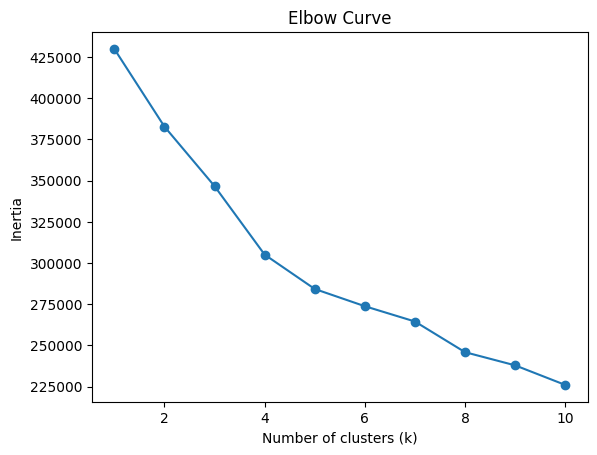

In [ ]:
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

### Fit, Predict, and Visualize K-means on the Optimal Amount of Clusters

In [ ]:
OPTIMAL_CLUSTERS = 6

In [ ]:
kmeans = KMeans(n_clusters=OPTIMAL_CLUSTERS, random_state=42)
ingredients_clusters = kmeans.fit_predict(ingredients_transformed)

In [ ]:
inertia = kmeans.inertia_
print(f"Total inertia for ingredients clusters: {inertia:.2f}")

Total inertia for ingredients clusters: 273831.47


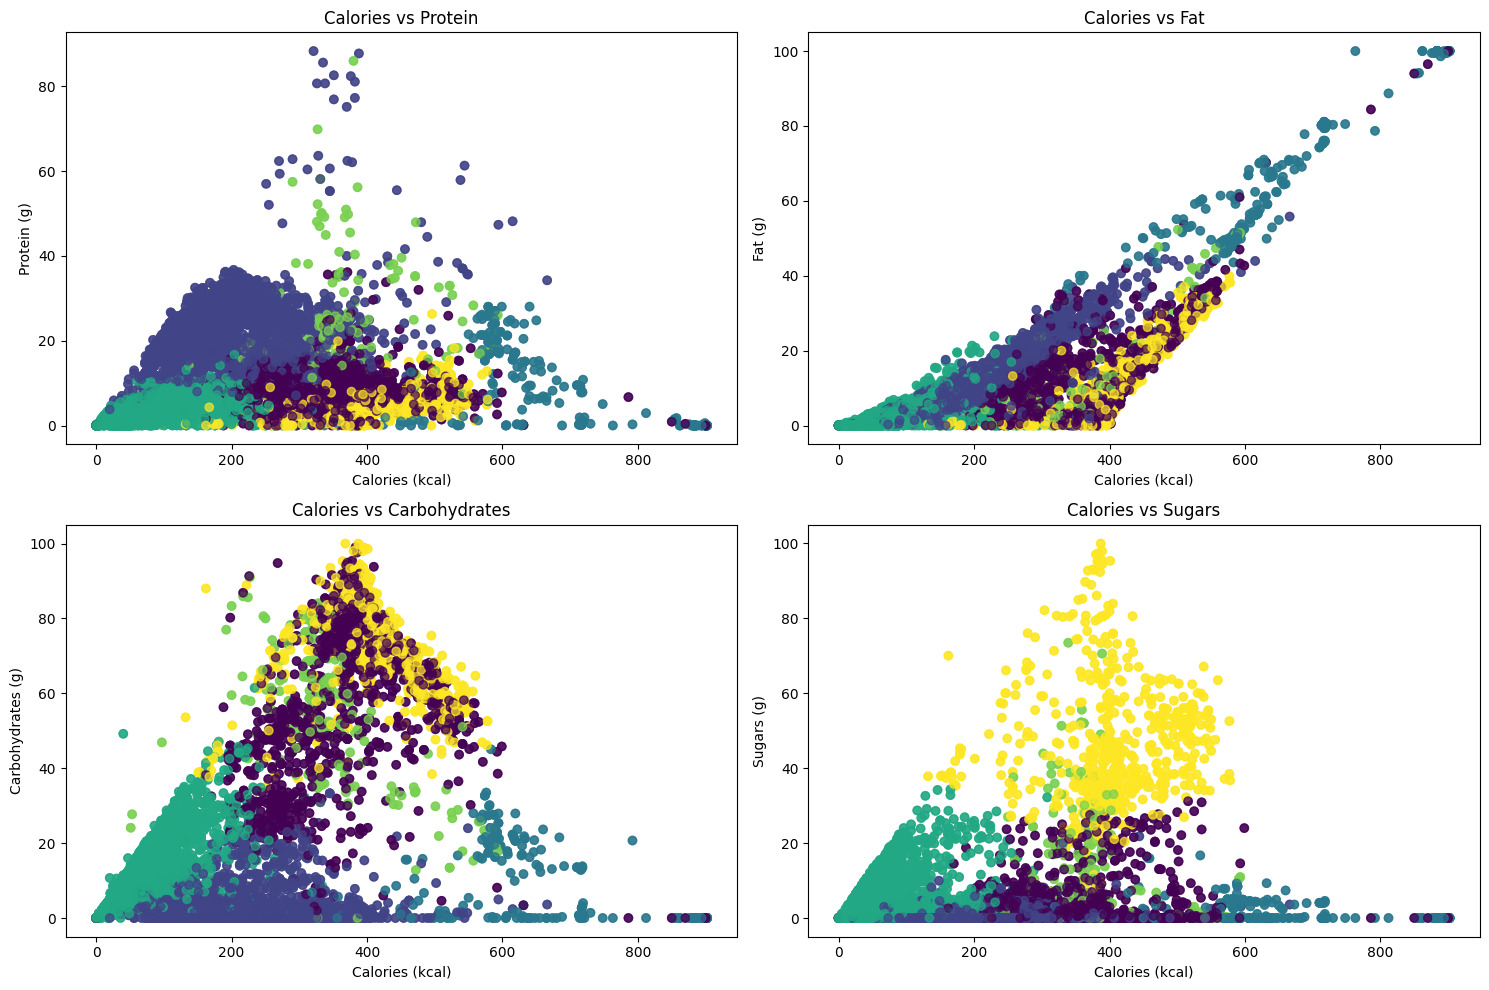

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Calories vs Protein
axes[0, 0].scatter(ingredients_df['kilocalories'], ingredients_df['protein'], c=ingredients_clusters, cmap='viridis', alpha=0.7)
axes[0, 0].set_title('Calories vs Protein')
axes[0, 0].set_xlabel('Calories (kcal)')
axes[0, 0].set_ylabel('Protein (g)')

# Calories vs Total Lipids
axes[0, 1].scatter(ingredients_df['kilocalories'], ingredients_df['fat_total_lipid'], c=ingredients_clusters, cmap='viridis', alpha=0.7)
axes[0, 1].set_title('Calories vs Fat')
axes[0, 1].set_xlabel('Calories (kcal)')
axes[0, 1].set_ylabel('Fat (g)')

# Calories vs Carbohydrates
axes[1, 0].scatter(ingredients_df['kilocalories'], ingredients_df['carbohydrate'], c=ingredients_clusters, cmap='viridis', alpha=0.7)
axes[1, 0].set_title('Calories vs Carbohydrates')
axes[1, 0].set_xlabel('Calories (kcal)')
axes[1, 0].set_ylabel('Carbohydrates (g)')

# Calories vs Sugar
axes[1, 1].scatter(ingredients_df['kilocalories'], ingredients_df['sugars'], c=ingredients_clusters, cmap='viridis', alpha=0.7)
axes[1, 1].set_title('Calories vs Sugars')
axes[1, 1].set_xlabel('Calories (kcal)')
axes[1, 1].set_ylabel('Sugars (g)')

plt.tight_layout()
plt.show()

### Run and Visualize PCA for Dimentionality Reduction to 2D

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
ingredients_2d = pca.fit_transform(ingredients_transformed)

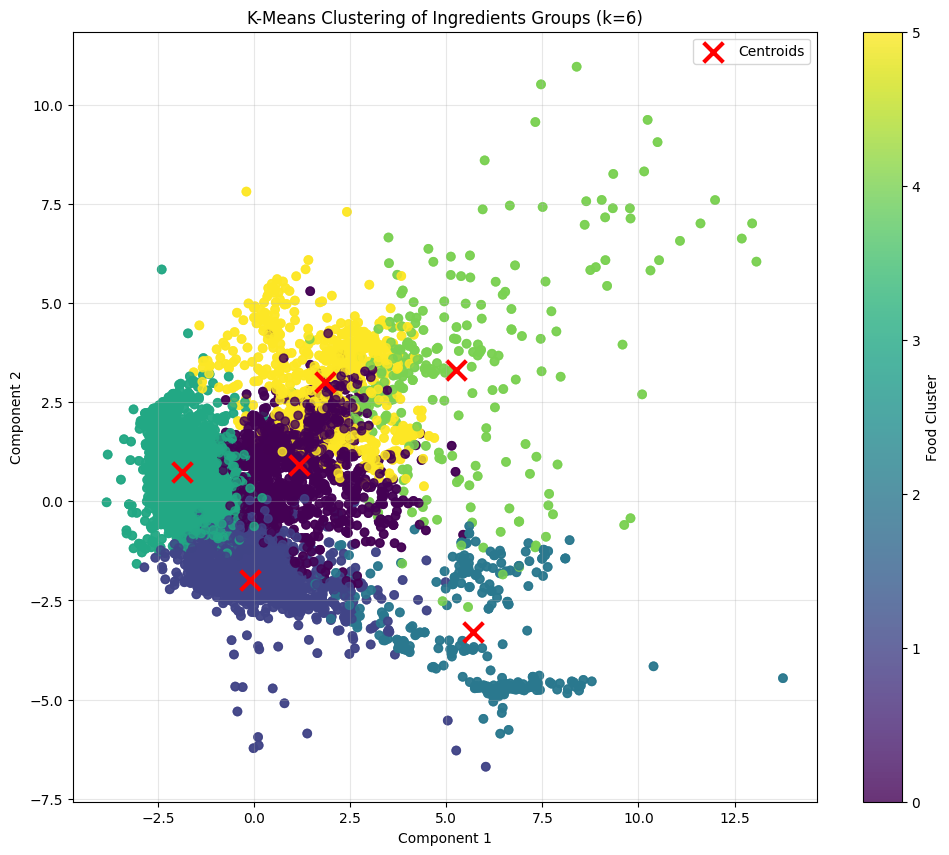

In [ ]:
plt.figure(figsize=(12, 10))

food_scatter_plot = plt.scatter(ingredients_2d[:, 0], ingredients_2d[:, 1],
                     c=ingredients_clusters,
                     cmap='viridis',
                     alpha=0.8)

food_cluster_centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(food_cluster_centers[:, 0], food_cluster_centers[:, 1],
           c='red',
           marker='x',
           s=200,
           linewidths=3,
           label='Centroids')

plt.title('K-Means Clustering of Ingredients Groups (k=6)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(food_scatter_plot, label='Food Cluster')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 4. ASSIGN LABELS TO CLUSTERS

### Display a Table of the Mean Feature Values for Each Cluster

In [ ]:
ingredients_df['Cluster'] = ingredients_clusters + 1

numeric_columns = ingredients_df.select_dtypes(include=[np.number])
mean_values = numeric_columns.groupby('Cluster').mean()
mean_values_transposed = mean_values.T

print("Mean Feature Values for Each Cluster:")
display(mean_values_transposed.style
        .format("{:.2f}")
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([{'selector': 'th', 'props': [('text-align', 'left')]}])
        .highlight_max(axis=1, color='green')
        .highlight_min(axis=1, color='red'))

Mean Feature Values for Each Cluster:


Cluster,1,2,3,4,5,6
carbohydrate,55.82,2.06,6.99,12.24,58.38,73.16
cholesterol,13.20,98.40,31.40,3.67,2.94,4.39
fiber,3.66,0.18,2.40,1.51,14.66,2.97
kilocalories,356.31,205.68,711.48,73.59,349.01,401.12
protein,8.66,22.23,6.65,2.48,18.93,5.44
sugars,3.65,0.34,1.23,3.97,10.23,45.01
water,20.79,62.46,9.69,82.11,6.77,8.55
fat_monosaturated,4.03,4.55,30.79,0.43,2.46,3.11
fat_polysaturated,2.75,1.38,19.63,0.29,3.37,1.52
fat_saturated,3.03,4.12,20.64,0.60,1.87,4.47


In [ ]:
cluster_sizes = ingredients_df['Cluster'].value_counts().sort_index()

print("\nCluster Sizes:")
display(cluster_sizes.to_frame().T.style
        .format("{:.0f}")
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([{'selector': 'th', 'props': [('text-align', 'left')]}]))


Cluster Sizes:


Cluster,1,2,3,4,5,6
count,2118,4856,572,5488,508,1284


### Cluster Labels:

* **Cluster 1: High-Carb, High-Sodium Foods**
  * High in carbohydrates
  * Highest in sodium
  * Lowest in vitamin A

* **Cluster 2: High-Cholesterol, High-Protein Foods**
  * Highest in colesterol
  * Highest in protein
  * Lowest fiber

* **Cluster 3: High-Fat, High-Calorie Foods**
  * Highest in total fats including saturated, monounsaturated, and polyunsaturated fats
  * Highest in calories
  * Highest in vitamin E

* **Cluster 4: Low-Calorie, High-Water Foods**
  * Lowest in calories
  * Highest in Water
  * Highest sodium per calorie

* **Cluster 5: Nutrient-Dense Foods** (High Fiber, Vitamins, and Minerals)
  * Highest in fiber
  * Highest in numerous vitamins and minerals (calcium, iron, magnesium, phosphorus, potassium, zinc, vitamin A, vitamin B, vitamin C, vitamin K)
  * Lowest in cholesterol

* **Cluster 6: High-Sugar, High-Carbs Foods**
  * Highest in carbohydrates
  * Highest in sugars
  * High in calories

## 5. Plot Foods onto Clusters

### Transform Foods Dataset with Ingredients Pipeline and use KMeans to Predict

In [ ]:
foods_transformed = full_pipeline.transform(foods_df)
foods_clusters = kmeans.predict(foods_transformed)

### Plot Food Data Points onto Ingredients Clusters

In [ ]:
pca = PCA(n_components=2)
foods_2d = pca.fit_transform(foods_transformed)

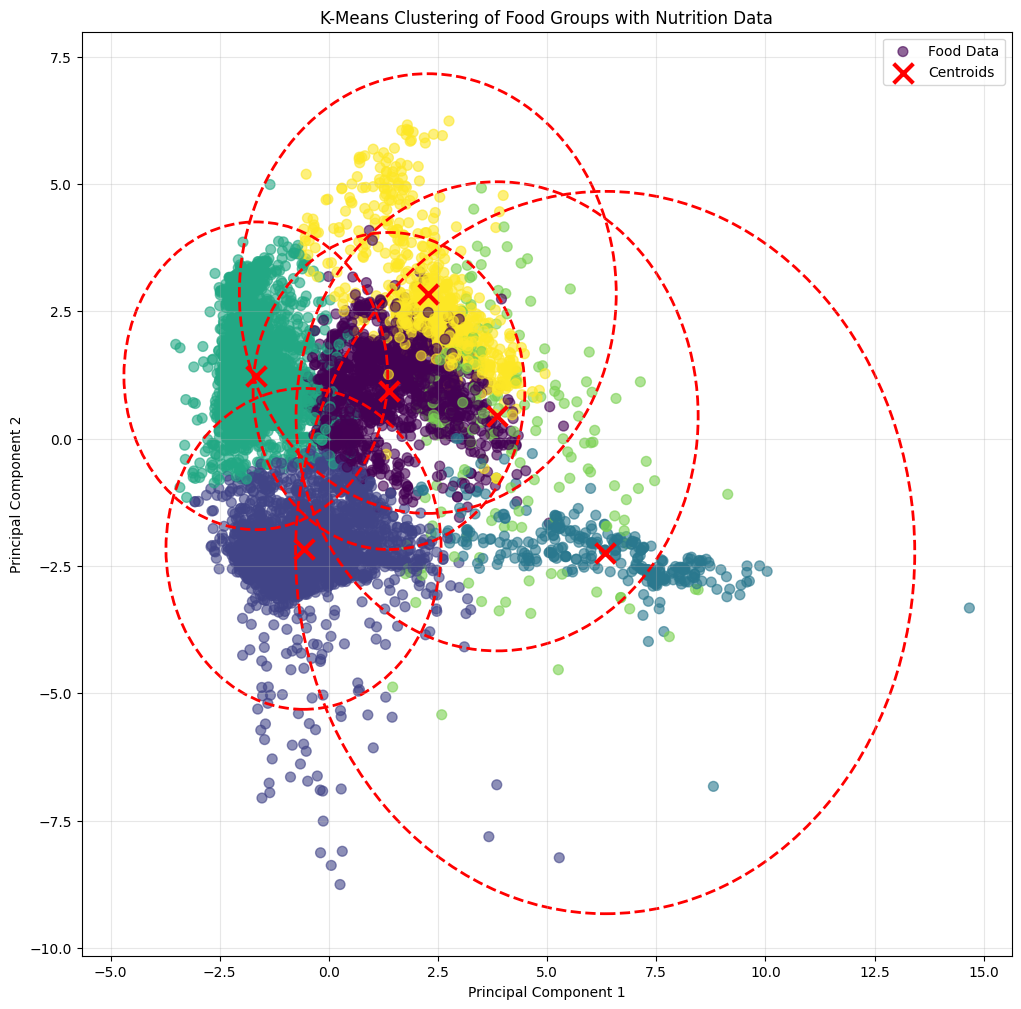

In [ ]:
import matplotlib.patches as patches

plt.figure(figsize=(12, 12))

# Plot food data points
food_scatter = plt.scatter(foods_2d[:, 0], foods_2d[:, 1],
                           c=foods_clusters,
                           cmap='viridis',
                           alpha=0.6,
                           s=50,
                           label='Food Data')

# Plot cluster centers
centers = kmeans.cluster_centers_
centers_2d = pca.transform(centers)
plt.scatter(centers_2d[:, 0], centers_2d[:, 1],
            c='red',
            marker='x',
            s=200,
            linewidths=3,
            label='Centroids')

# Plot cluster boundaries
for center in centers_2d:
    distances = np.sqrt(np.sum((foods_2d - center)**2, axis=1))
    radius = np.mean(distances)

    circle = patches.Circle(center, radius, fill=False, edgecolor='red', linestyle='--', linewidth=2)
    plt.gca().add_patch(circle)

plt.title('K-Means Clustering of Food Groups with Nutrition Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

### Output Table of Foods Associated with Each Ingredients Cluster

In [ ]:
foods_results = pd.DataFrame({
    'name': foods_names,
    'predicted_cluster': foods_clusters
})

cluster_foods = {i: [] for i in range(OPTIMAL_CLUSTERS)}

for index, row in foods_results.iterrows():
    cluster = row['predicted_cluster']
    food_name = row['name']
    cluster_foods[cluster].append(food_name)

In [ ]:
def create_cluster_table(cluster, foods):
    df = pd.DataFrame({'Food': foods[:50]})
    styled_df = df.style.set_properties(**{
        'text-align': 'left',
        'white-space': 'pre-wrap',
        'font-size': '12px'
    }).set_table_styles([{
        'selector': 'th',
        'props': [('font-size', '14px'), ('text-align', 'center'), ('font-weight', 'bold')]
    }])
    return styled_df

for cluster, foods in cluster_foods.items():
    total_foods = len(foods)
    display(HTML(f"<h3>Cluster {cluster+1}</h3>"))
    display(create_cluster_table(cluster, foods))
    if total_foods > 50:
        display(HTML(f"<p>... and {total_foods - 100} more foods</p>"))
    display(HTML("<br>"))

,Food
0,Cornstarch
1,"Teff, uncooked"
2,"Crackers, rusk toast"
3,"Pie, lemon, fried pies"
4,"Candies, sesame crunch"
5,"Chewing gum, sugarless"
6,"Pasta, unenriched, dry"
7,"Cookies, Marie biscuit"
8,"McDONALD'S, Hash Brown"
9,"Gravy, mix, dry, onion"


,Food
0,"Lamb, raw, ground"
1,"Cheese, camembert"
2,Vegetarian fillets
3,"Chicken, boiled, feet"
4,"Quail, raw, meat only"
5,"Salami, turkey, cooked"
6,"Cheese, low fat, cream"
7,"Ostrich, raw, top loin"
8,"Emu, raw, outside drum"
9,"Fish, raw, sheepshead"


,Food
0,"Nuts, pecans"
1,"Nuts, dried, pine nuts"
2,"Nuts, dried, beechnuts"
3,"Butter oil, anhydrous"
4,"Oil, soybean lecithin"
5,"Peanuts, raw, spanish"
6,"Nuts, dried, pilinuts"
7,"Butter, without salt"
8,"Oil, corn and canola"
9,"Oil, ucuhuba butter"


,Food
0,"Eggplant, raw"
1,"Sherbet, orange"
2,"Cauliflower, raw"
3,"Taro leaves, raw"
4,"PACE, Picante Sauce"
5,"Mango nectar, canned"
6,"Peppers, raw, jalapeno"
7,"Winged bean tuber, raw"
8,"Grapes, raw, muscadine"
9,"Nuts, raw, ginkgo nuts"


,Food
0,"Spices, ground, savory"
1,"Peppers, dried, ancho"
2,"Parsley, freeze-dried"
3,"Spices, black, pepper"
4,"Chives, freeze-dried"
5,"Seaweed, dried, agar"
6,"Spices, curry powder"
7,"Celery flakes, dried"
8,"Spices, celery seed"
9,"Soy flour, defatted"


,Food
0,"Goji berries, dried"
1,"Syrup, Canadian, maple"
2,"Currants, dried, zante"
3,"KEEBLER, Waffle Cones"
4,"KEEBLER, Waffle Bowls"
5,"MURRAY, Vanilla Wafer"
6,"Figs, uncooked, dried"
7,"Syrup, fruit flavored"
8,"Candies, marshmallows"
9,"Candies, butterscotch"
